# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from phik import phik_matrix
from utils import *

import warnings
warnings.filterwarnings('ignore')

# 2. Load data & Basic information

In [2]:
bureau_balance = load_data('dseb63_bureau_balance.csv',
                           verbose=3,
                           filename_train='dseb63_application_train.csv',
                           merge_sk_id_curr_filename='dseb63_bureau.csv')

Table: dseb63_bureau_balance.csv
Shape: (27299925, 4)

Number of categorical variables: 1
Number of numerical variables: 3

Number of unique values of SK_ID_CURR: 263491

Number of duplicate values: 0

Shape of train set: (246009, 123)
Number of overlapping SK_ID_CURR in dseb63_bureau_balance.csv and dseb63_application_train.csv: 210809


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS,SK_ID_CURR,TARGET
0,5715448,0,C,254629.0,0.0
1,5715448,-1,C,254629.0,0.0
2,5715448,-2,C,254629.0,0.0
3,5715448,-3,C,254629.0,0.0
4,5715448,-4,C,254629.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 5 columns):
 #   Column          Non-Null Count     Dtype  
---  ------          --------------     -----  
 0   SK_ID_BUREAU    27299925 non-null  int64  
 1   MONTHS_BALANCE  27299925 non-null  int64  
 2   STATUS          27299925 non-null  object 
 3   SK_ID_CURR      1465325 non-null   float64
 4   TARGET          1173378 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.0+ GB


# 3. Target Column

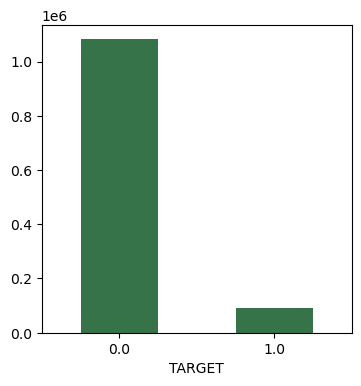

In [3]:
bureau_balance.TARGET.value_counts().plot.bar(color='#377349', figsize=(4,4), rot=0);

### Observation
- Most of the loans were paid back on time
- Data is highly imbalanced that the proportion between class 0 and class 1 is about 92:8

# 4. Missing values

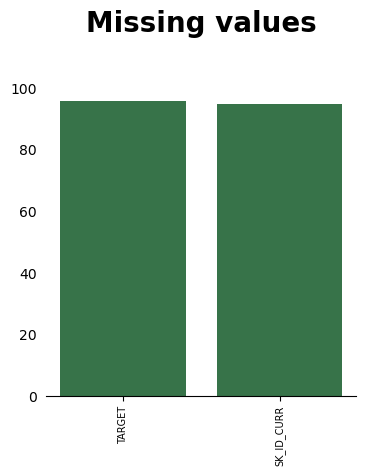

In [4]:
df_missing = create_df_missing(bureau_balance)
plot_df_missing(df_missing,figsize=(4,4), x_title=0.5, x_subtitle=0.3, text=False, show_grid=False, title_size=20)

### Observation
Only added columns (TARGET, SK_ID_CURRR) contains missing values

# 5. Define Categorical and Numerical Features

In [5]:
bureau_balance, cate_bb, num_bb = validate_dtype(bureau_balance)

# 6. Imbalanced Class

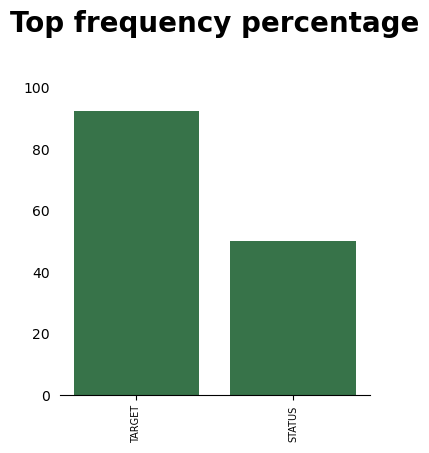

In [6]:
plot_imbalance(describe_class(cate_bb), x_title=0.5, figsize=(4,4), title_size=20, show_grid=False)

### Observation
- Data is highly imbalanced that the proportion between class 0 and class 1 in TARGET is about 92:8

# 7. Outlier

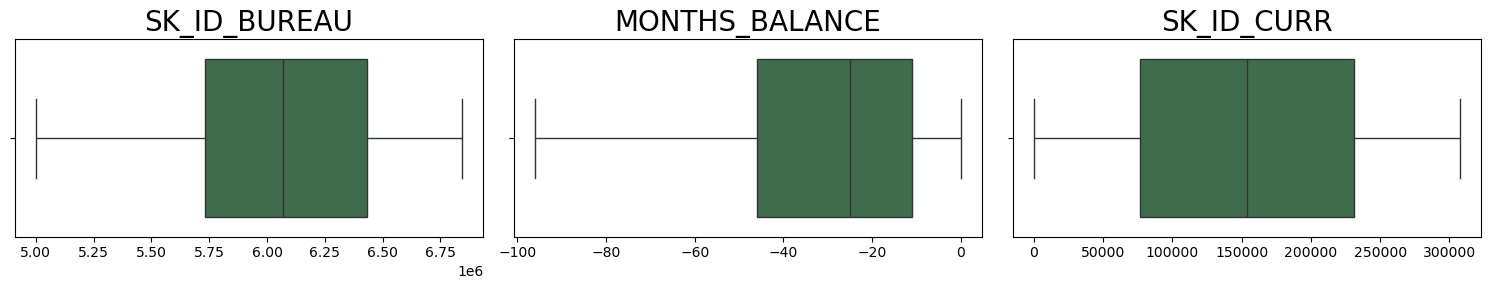

In [7]:
plot_boxplot(num_bb, figsize=(20,3))

### Observation
Most features have very few outliers.

# 8. Anomalies

## 8.1. Numerical Values

In [8]:
bureau_balance.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_BUREAU,27299925.0,6.036297e+06,492348.856904,5001709.0,5730933.0,6070821.0,6431951.0,6842888.0
MONTHS_BALANCE,27299925.0,-3.074169e+01,23.864509,-96.0,-46.0,-25.0,-11.0,0.0
SK_ID_CURR,1465325.0,1.538762e+05,88898.878451,0.0,76685.0,154040.0,230856.0,307509.0


### Observation
There are no anomalies in numerical values.

## 8.2. Categorical Values

# 9. Correlation

In [9]:
cmat = CorrelationMatrix(bureau_balance, drop_cols=['SK_ID_CURR', 'SK_ID_BUREAU'])

In [10]:
cmat.target_top()

,PhiK-Correlation
STATUS,0.007631
MONTHS_BALANCE,0.000000


## Numerical Values

In [11]:
cmat.target_top_num()

,Correlation
MONTHS_BALANCE,0.000044


### Observation
- There is only one numerical feature beside SK_ID_CURR and SK_ID_BUREAU, therefore, there is not enough information to draw any insights.
- The correlation of MONTHS_BALANCE with TARGET is low. Therefore, there is no linear relationship between the feature and the target variable.

# 10. Categorical Analysis

## Categories of STATUS

Total Number of unique categories of STATUS = 8


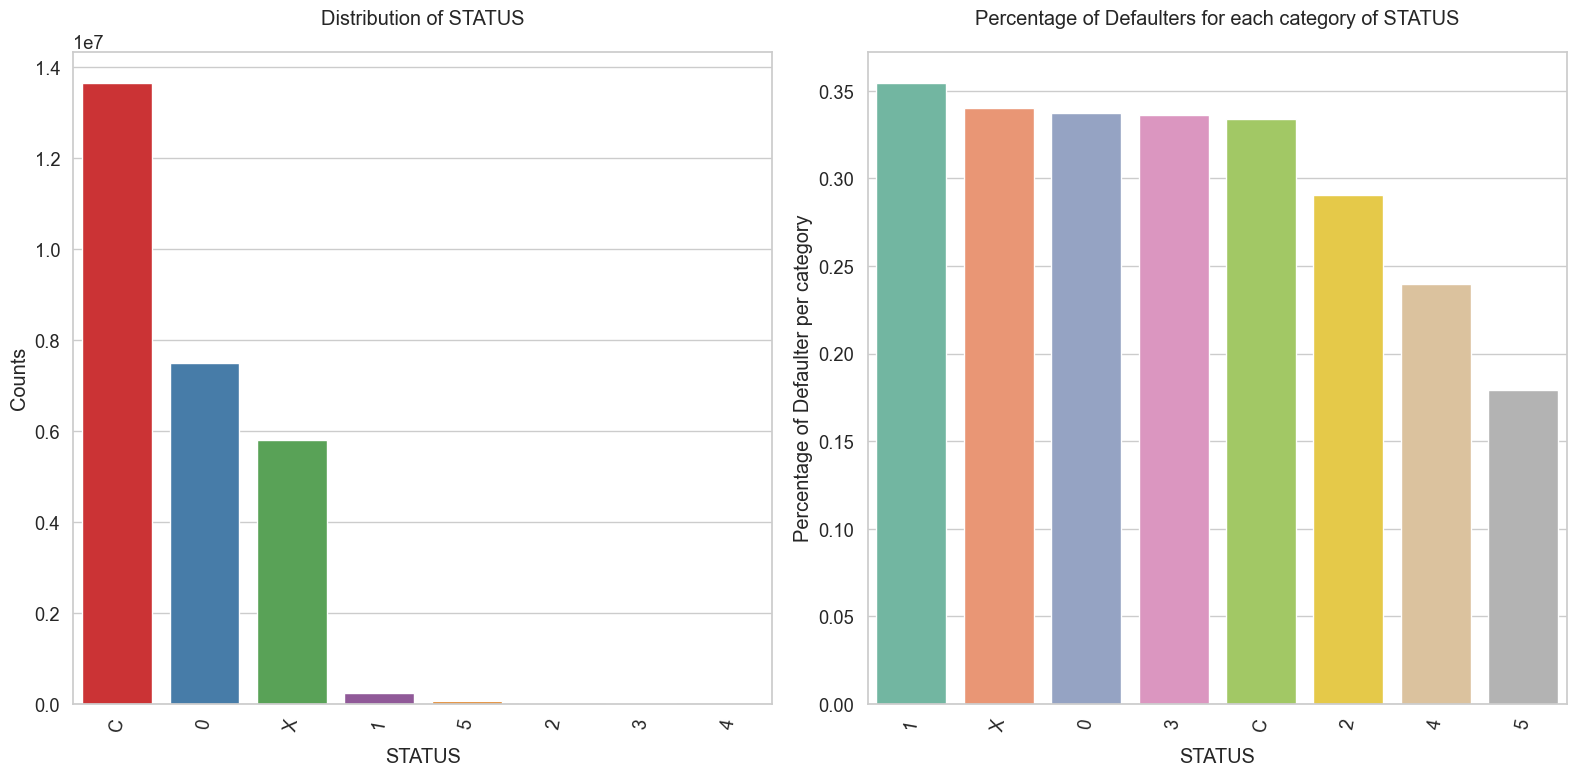

In [12]:
plot_categorical_variables_bar(bureau_balance,'STATUS',rotation=80)

### Observation
We can see that besides approximately **13500000** closed loans and **7500000** loans in process, there are around **330000** loans being past due and over **5800000** loans with unknown status.

## 11. Numerical Analysis

## 11.1 Relation between MONTHS_BALANCE and TARGET

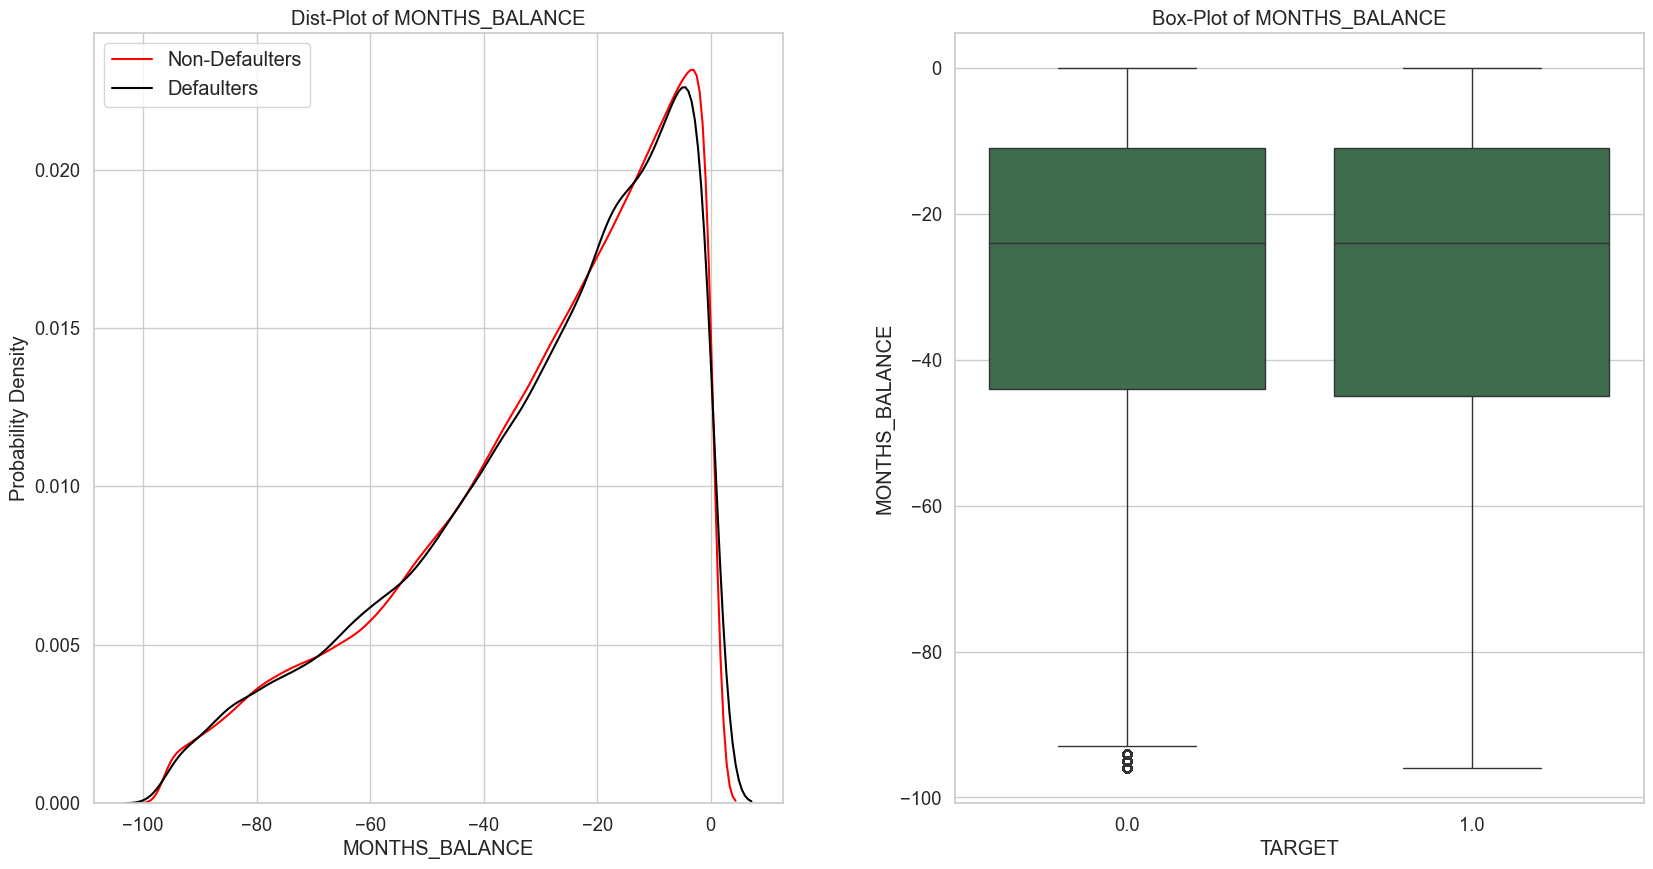

In [13]:
plot_continuous_variables(bureau_balance, 'MONTHS_BALANCE', plots=['distplot','box'], figsize=(20,10))

### Observation
- **MONTHS_BALANCE** refers to the number of months since the loan was issued (-1 means the latest update), therefore, we can see that the statistics is pretty up-to-date with numbers of loans updated lately.
- Looking at the boxplot, even though there is a few outliers, the distribution of the two classes is quite similar and does not reflect the ability to repay the loan of a customer.

## 11.2 Relation between the number of unique loan status and TARGET

In [14]:
loan_status = bureau_balance[['SK_ID_CURR', 'STATUS', 'TARGET']].groupby(['SK_ID_CURR','TARGET'])['STATUS'].nunique().reset_index()
# Excluding all the records with STATUS = 0 as they are missing values
loan_status = loan_status[loan_status['STATUS'] != 0]
loan_status.head()

,SK_ID_CURR,TARGET,STATUS
0,0.0,0.0,1
1,1.0,1.0,1
2,2.0,0.0,1
3,3.0,0.0,1
4,4.0,0.0,1


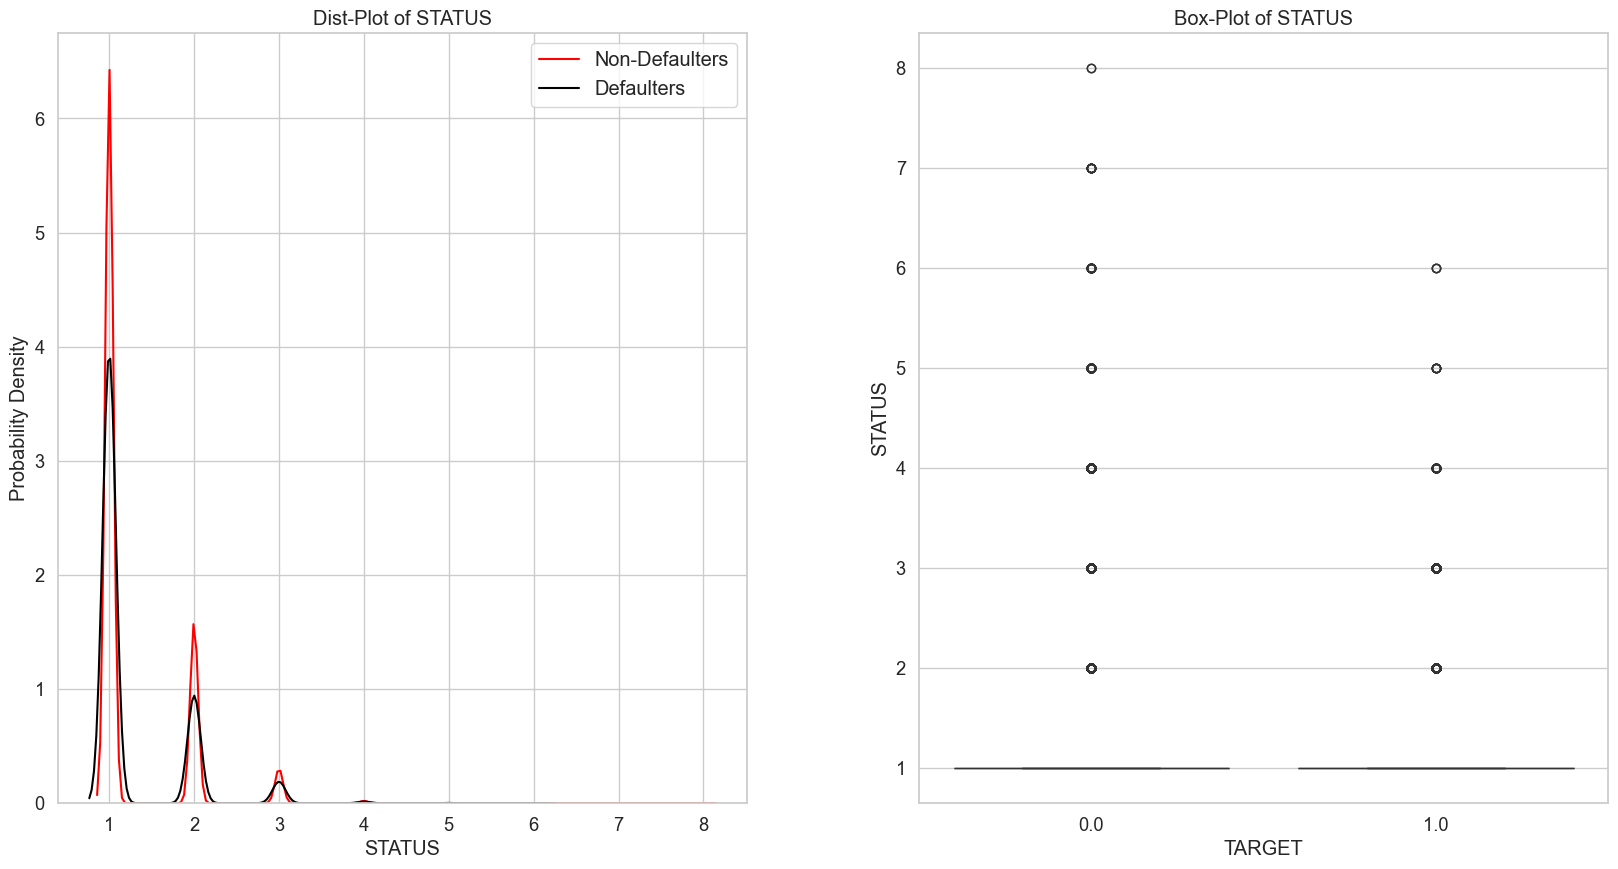

In [15]:
plot_continuous_variables(loan_status,'STATUS', plots = ['distplot','box'],figsize=(20,10))

### Observation
- The distribution of 'STATUS' has several common values for both defaulters and non-defaulters, with no single value significantly more common in one group over the other.